# Intro

The deadliest race In the world (Isle of Man TT) takes place anually on the remote Isle Of Man. It's a 37.73 mile motorcycle race that only the top riders in the world dare attempt. The highest average speed for the track is 136mph, and the record top speed is over 200mph. Unfortunately, many have lost their lives in this race. I discovered a data set with the fatality information and decided to analyze the data.

Here is a map of the race course:

![Race Course](tt_race.jpg)

# Goal

The goal is to visualize the number of deaths per year and the most common locations on the track fatalities occur at. 

# Importing Libraries 

Pandas for efficiently cleaning and formatting data.
Plotly for visualizing and interacting with data.
Matplotlib for visualizing data.

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
# This figure size parameter gives us a larger default graph.
plt.rcParams['figure.figsize'] = [31, 14]
import plotly.graph_objs as go
import datetime

# Getting The Data

The first step is to read in the data and check its basic properties.

In [4]:
race_data = pd.read_csv('race_stats.csv')
race_data.info()
race_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       266 non-null    int64  
 1   Country  0 non-null      float64
 2   Rider    266 non-null    object 
 3   Date     266 non-null    object 
 4   Place    266 non-null    object 
 5   Race     266 non-null    object 
 6   Event    266 non-null    object 
 7   Machine  266 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 16.8+ KB


,No,Country,Rider,Date,Place,Race,Event,Machine
0,1,NaN,Victor Surridge,27 June 1911[4],Glen Helen[5],1911 Isle of Man TT,Practice,Rudge-Whitworth[6]
1,2,NaN,Frank R Bateman,6 June 1913[7],Creg-ny-Baa,1913 Isle of Man TT,Senior TT,499cc Rudge
2,3,NaN,Fred Walker,19 May 1914[8],St Ninian's Crossroads[9],1914 Isle of Man TT,Junior TT,Royal Enfield
3,4,NaN,JHH Veasey,15 June 1923[10],Greeba Bridge,1923 Isle of Man TT,Senior TT,500cc Douglas
4,5,NaN,Ned Brew,15 September 1923[11],Hillberry Corner,1923 Manx Amateur Road Races,Practice,Frera


After running the code, we can see the data set has 266 rows (Thus, 266 deaths), 6 columns, and it appears all the values in the "Country" column are "NaN". We'll want to change the data type of the Date column to datetime. 

# Cleaning And Formatting The Data

We need to drop the column "Country" and set the "Date" column as a datetime data type.

In [5]:
race_data.drop(['Country'], axis = 1, inplace = True)

In [7]:
# First, we set the Date column to a str data type.
race_data['Date'] = race_data['Date'].astype(str)

In [8]:
# Next we extract the desired format
race_data['Date'] = race_data['Date'].str.extract(r'(\d+\s\w+\s\d+)')

In [12]:
# Finally we change the data type from string to datetime.
race_data['Date'] = pd.to_datetime(race_data['Date'])

Let's add a Year column that only lists the year of the riders death (leaving out the month and day).

In [13]:

race_data['Year'] = race_data['Date'].dt.year

In [75]:
# Checking to make sure our changes worked.
race_data.head(2)

,No,Rider,Date,Place,Race,Event,Machine,Year
0,1,Victor Surridge,1911-06-27,Glen Helen[5],1911 Isle of Man TT,Practice,Rudge-Whitworth[6],1911
1,2,Frank R Bateman,1913-06-06,Creg-ny-Baa,1913 Isle of Man TT,Senior TT,499cc Rudge,1913


Next, we will set the columns "Rider", "Place", "Race", "Event", "Machine", and "Year" to categorical data types.

In [20]:
race_data['Rider'] = race_data['Rider'].astype('string')
race_data['Place'] = race_data['Place'].astype('category')
race_data['Race'] = race_data['Race'].astype('category')
race_data['Event'] = race_data['Event'].astype('category')
race_data['Machine'] = race_data['Machine'].astype('category')
race_data['Year'] = race_data['Year'].astype('category')

# Visualizing The Data

Using categorical plotting techniques, we will create a plot in plotly that displays the number of deaths per year.

In [73]:
# Creating the frequency distribution of the Year column
counts = race_data['Year'].value_counts()
# Creating a bar chart and assigning values to the x and y axis
trace= go.Bar(x = counts.index, y=counts.values)
# Creating the labels for x and y axis
layout = go.Layout(xaxis=dict(title='Year'), yaxis=dict(title='Number of Deaths'))
# Assigning those values to the figure.
fig = go.Figure(data=[trace], layout = layout)
# Adding the plot title
fig.update_layout(title_text='Bar Chart Of Motorcycle Deaths')
# Displaying the plot
fig.show()

All the values that are blank (with the exception of 1982) are years the race was not held. 2005 is the deadliest year with an astonishing 9 rider deaths. Notice how the last 20 years still have high death tolls. One might expect the number of deaths in recent years to drop due to stricter safety standards and state-of-the-art safety technology (improved helmets, airbag jackets). However, the data tells a different story.

To further visualize this data we'll use matplotlib to plot the deaths per year in descending order.

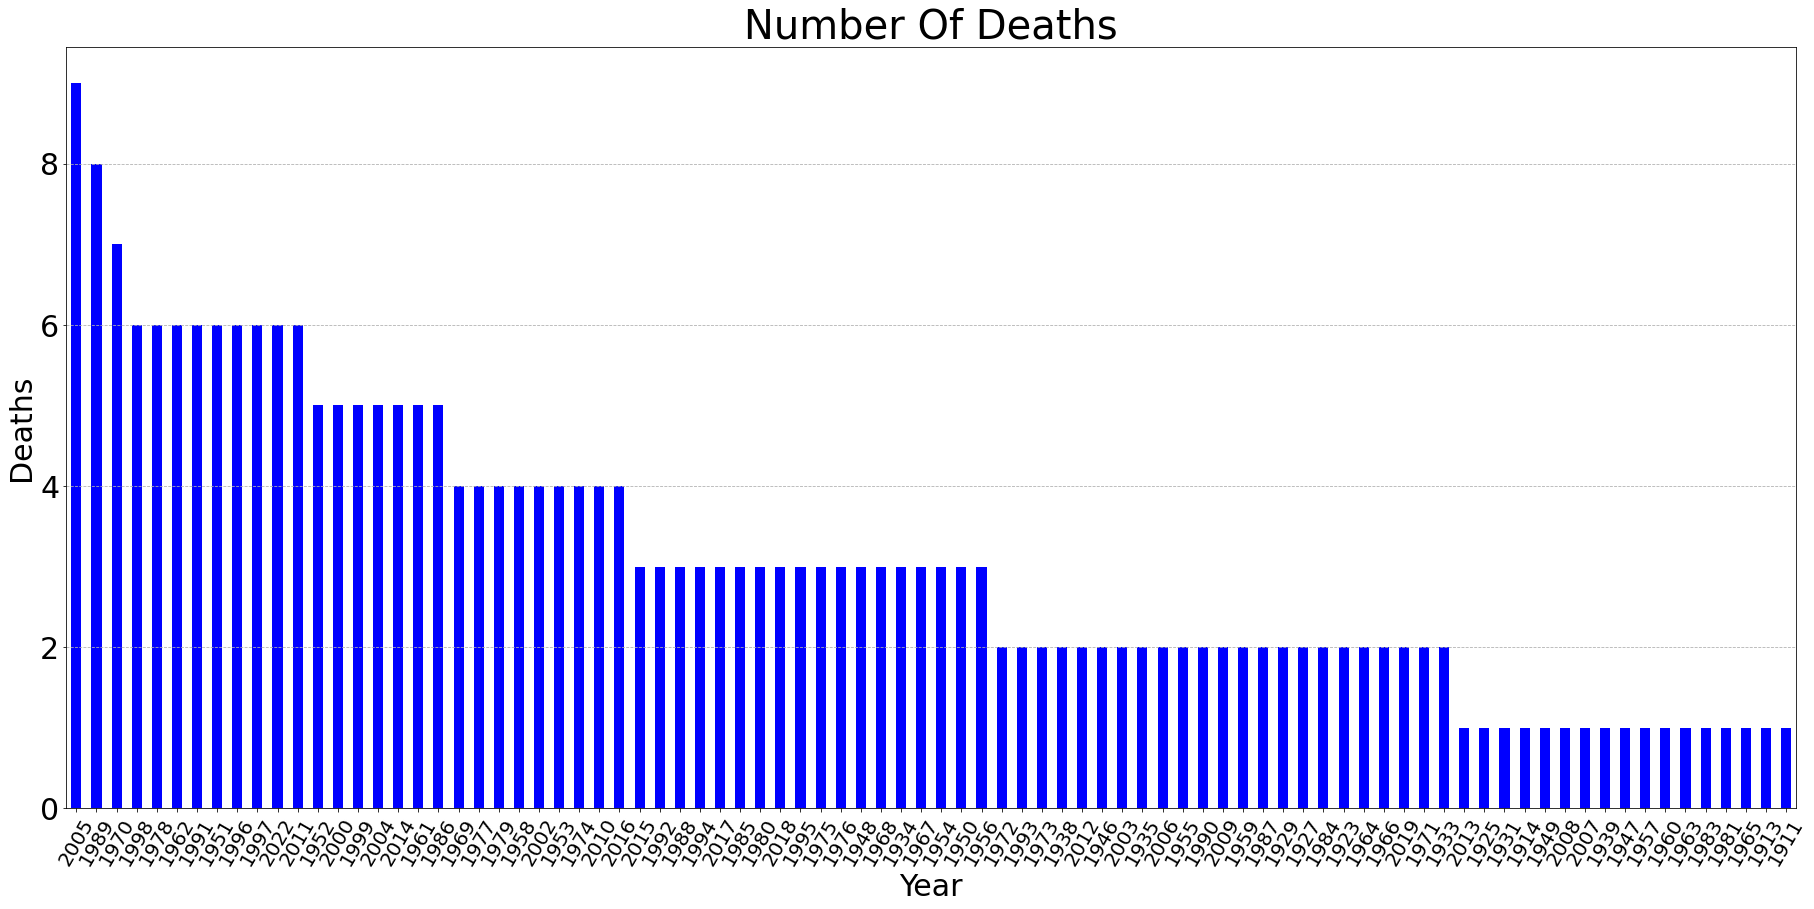

In [87]:

# count the frequency of each category
counts = race_data['Year'].value_counts()
# plot a bar chart
counts.plot.bar(color='blue')
# set the axis labels and title
plt.xlabel('Year', fontsize=30)
plt.ylabel('Deaths', fontsize=30)
plt.title('Number Of Deaths', fontsize=40)

# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# rotate x-axis labels
plt.xticks(rotation=60, fontsize=20)
plt.yticks(fontsize = 30)
# add grid
plt.grid(axis='y', linestyle='--')

# show the plot
plt.show()

In [71]:
mean = round(counts.mean(), 2)
mean

3.09

In the above code we can see the average deaths per year is slightly over 3 (of the years that had fatalities).

Next we'll plot the distribution of crashes at each location using plotly.

In [76]:
# Creating a frequency table with the categorical data
counts = race_data['Place'].value_counts()
# Assigning the x and y axis
trace= go.Bar(x = counts.index, y=counts.values)
# Creating the labels for x and y axis
layout = go.Layout(xaxis=dict(title='Place'), yaxis=dict(title='Number of Deaths'))
# Assigning those values to the figure.
fig = go.Figure(data=[trace], layout = layout)
# Adding the plot title
fig.update_layout(title_text='Bar Chart Of Motorcycle Deaths')
# Displaying the plot
fig.show()

The chart clearly reveals that the 33rd Milestone has witnessed the highest number of fatalities, a staggering 9 deaths, making it the deadliest stretch of the track.

In conclusion, the analysis of the data indicates that an average of three deaths occurred each year. Unfortunately, there is no evidence of a decreasing trend in the rate of deaths over time. Shockingly, the year 2005 recorded the highest number of fatalities to date. Moreover, the data indicates that certain areas of the track pose a higher risk than others, presumably due to treacherous terrain or sharper curves. It's astonishing to see riders return year after year to maneuver this track at lightning-fast speeds, despite the extreme danger and the high probability of death.